# Estimation and Inference

Example: Customer Churn
Using the [IBM data set Telco customer churn](https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset)

In [17]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
# read xlsx into pandas dataframe
df_phone = pd.read_excel("data/Telco_customer_churn.xlsx")
df_phone

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mailed check'),
  Text(1, 0, 'Electronic check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

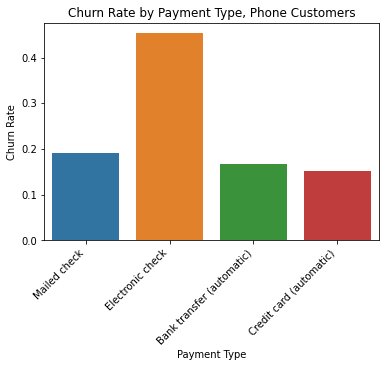

In [19]:
# Examining churn data, churn value by payment type
sns.barplot(y="Churn Value", x="Payment Method", data=df_phone, ci=None)
plt.ylabel("Churn Rate")
plt.xlabel("Payment Type")
plt.title("Churn Rate by Payment Type, Phone Customers")
plt.xticks(rotation=45, ha='right')

In [30]:
list(df_phone)

['CustomerID',
 'Count',
 'Country',
 'State',
 'City',
 'Zip Code',
 'Lat Long',
 'Latitude',
 'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Label',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'Churn Reason']

Text(0.5, 1.0, 'Churn Rate by Tenure, Phone Customers')

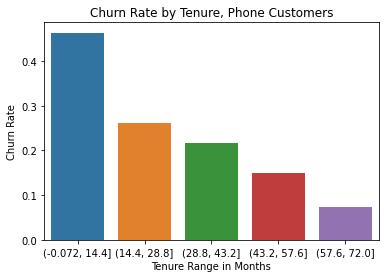

In [29]:
# Examining churn data, this time by tenure (month)

sns.barplot(y="Churn Value",
            # turn date into categorical value by chunking them into bins)
            x=pd.cut(df_phone['Tenure Months'],
                     bins=5),
            data=df_phone, ci=None)
plt.xlabel("Tenure Range in Months")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Tenure, Phone Customers")

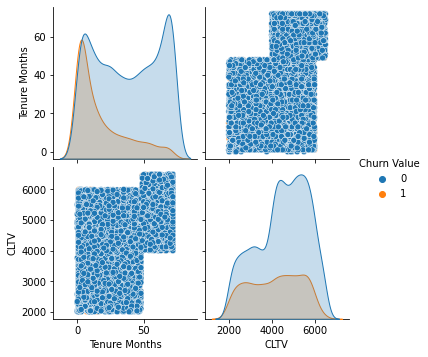

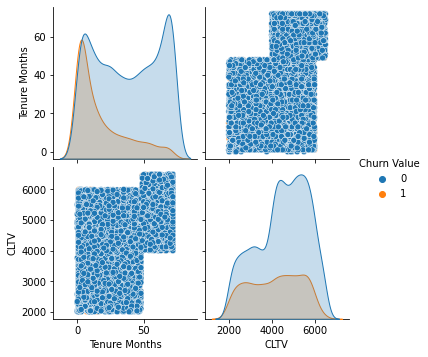

In [42]:
# Seaborn plot, feature correlations
pair_plot = df_phone[['Tenure Months',
                     'Churn Value',
                     'CLTV',
                     'Total Charges']]
sns.pairplot(pair_plot,
             hue='Churn Value')

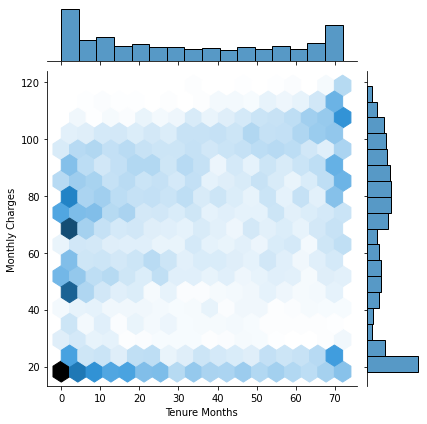

In [45]:
# Seaborn hexbin plot
sns.jointplot(x=df_phone['Tenure Months'],
              y=df_phone['Monthly Charges'],
              kind="hex")